# Project Name: Global shark attack

<div> <img src="https://images.maariv.co.il/image/upload/f_auto,fl_lossy/c_fill,g_faces:center,h_470,w_690/976391" width="500"/> </div>

### Group number: 7  

### Project team members: 
-  לינוי שכטר
-  נגה פויכטונגר
-  רון ווסרמן

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url_list = ['https://raw.githubusercontent.com/ronwasserman/Global-Shark-Attack---World/refs/heads/main/part_1.csv','https://raw.githubusercontent.com/ronwasserman/Global-Shark-Attack---World/refs/heads/main/part_2.csv']

super_df = pd.DataFrame()

for i, url in enumerate(url_list):
    df = pd.read_csv(url, encoding='utf-8-sig')  
    if i == 0:  
        super_df = df
    else:  
        super_df = pd.concat([super_df, df], ignore_index=True)

super_df = super_df.rename(columns={'ï»¿Date ': 'Date'})  


def map_to_ocean(area_text, ocean_map):
    area_text = str(area_text).lower()
    for ocean, keywords in ocean_map.items():
        for keyword in keywords:
            if keyword in area_text:
                return ocean
    return 'Unknown'

def map_to_ocean(area_text, ocean_map):
    area_text = str(area_text).lower()
    for ocean, keywords in ocean_map.items():
        for keyword in keywords:
            if keyword in area_text:
                return ocean
    return 'Unknown'



# <span style="color:#0077BE "> Part 1 - The relationship between countries and activity during shark attacks</span>
 
 <div dir='rtl'>

<div> <img src="https://img.freepik.com/premium-photo/painting-shark-with-fish-it_916191-5269.jpg" width="500"/> </div>

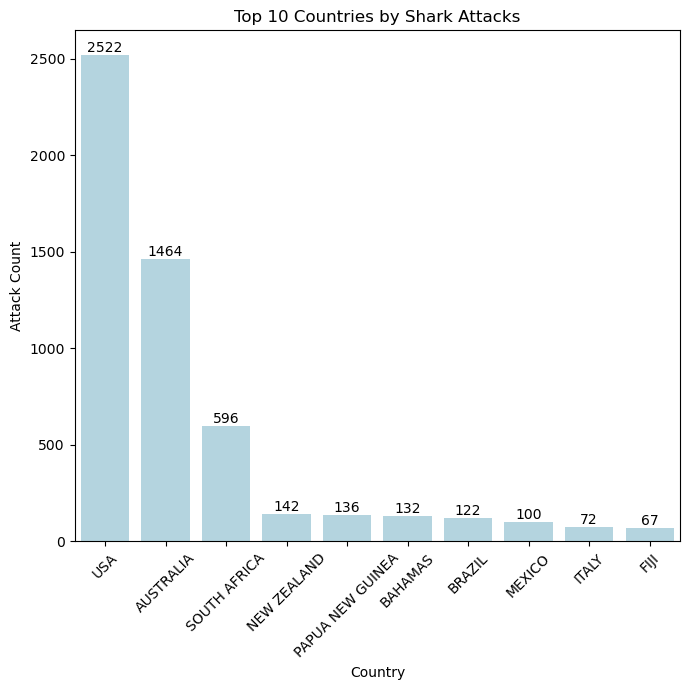

In [8]:
attacks_by_country = super_df['Country'].value_counts().reset_index()
attacks_by_country.columns = ['Country', 'Attack Count']
max_attacks = attacks_by_country.iloc[0:10]

fig, ax = plt.subplots(figsize=(7, 7))
bars = sns.barplot(data=max_attacks, x="Country", y="Attack Count", ax=ax, color='lightblue')

ax.bar_label(bars.containers[0], fmt='%d', label_type='edge') 

plt.xticks(rotation=45)
plt.title("Top 10 Countries by Shark Attacks")
plt.tight_layout()
plt.show()

In [9]:
us_attacks = super_df[super_df['Country'] == 'USA']

activity_counts = us_attacks['Activity'].value_counts().head(7)

swimming_rank = (activity_counts.index.get_loc('Swimming') + 1)

print("Ranking of all activities in the USA:")
print(activity_counts)
print("Swimming activity in the USA: {activity_counts['Swimming']}")

Ranking of all activities in the USA:
Activity
Surfing         652
Swimming        369
Fishing         142
Wading          119
Standing         72
Spearfishing     64
Snorkeling       39
Name: count, dtype: int64
Swimming activity in the USA: {activity_counts['Swimming']}


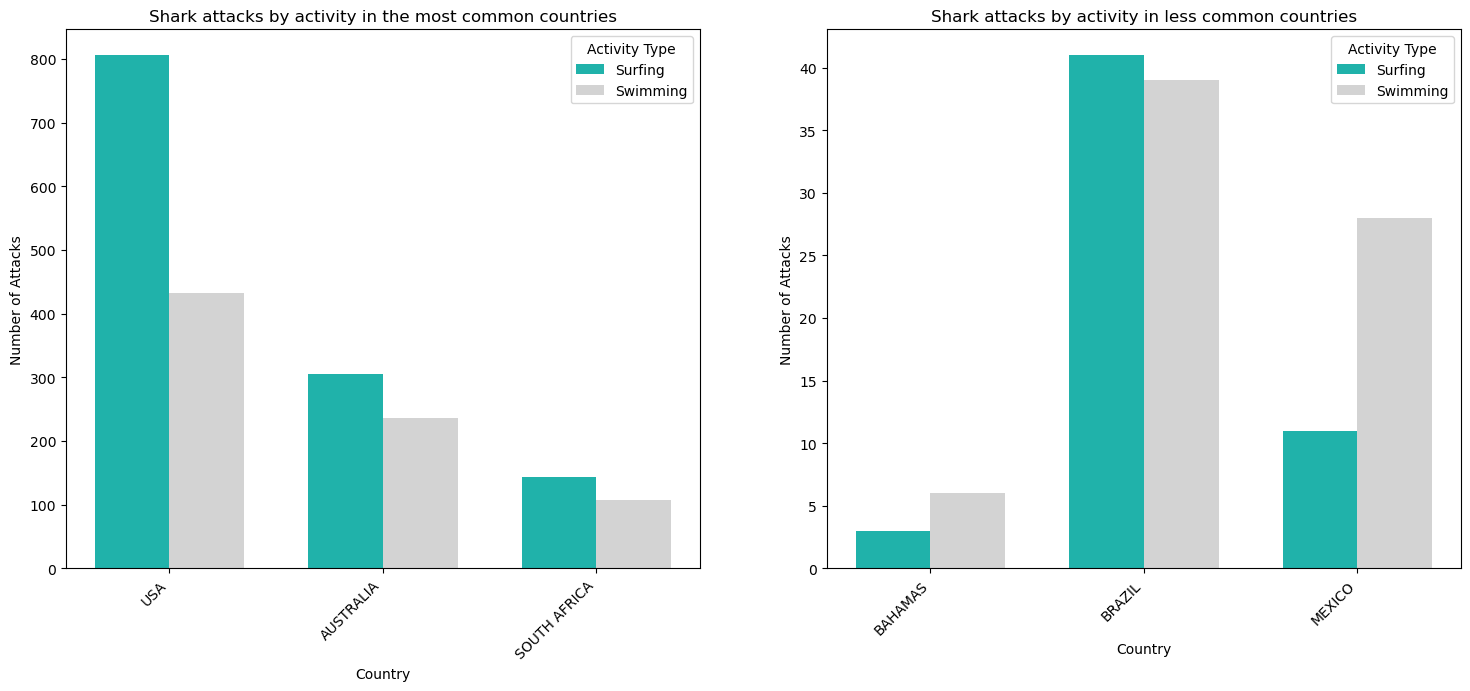

In [10]:
super_df['Is Surfing'] = super_df['Activity'].str.contains('Surf', case=False, na=False)

super_df['Is Swimming'] = super_df['Activity'].str.contains('Swim', case=False, na=False)

grouped_data = super_df.groupby('Country').agg(Surfing=('Is Surfing', 'sum'),Swimming=('Is Swimming', 'sum')).astype(int)

countries_high = ['USA', 'AUSTRALIA', 'SOUTH AFRICA']
countries_low = ['BAHAMAS', 'BRAZIL', 'MEXICO']

fig, axes = plt.subplots(1, 2, figsize=(18, 7)) 

plot_data_1 = grouped_data.reindex(countries_high, fill_value=0)
index_positions_1 = np.arange(len(plot_data_1))  # ✅ שורה שנוספה כדי למנוע שגיאה

bar_width = 0.35

axes[0].bar(index_positions_1 - bar_width/2, plot_data_1['Surfing'], bar_width, label='Surfing', color='lightseagreen')

axes[0].bar(index_positions_1 + bar_width/2, plot_data_1['Swimming'], bar_width, label='Swimming', color='lightgray')

axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Attacks') 
axes[0].set_title('Shark attacks by activity in the most common countries')
axes[0].set_xticks(index_positions_1)
axes[0].set_xticklabels(plot_data_1.index, rotation=45, ha='right')
axes[0].legend(title='Activity Type')

plot_data_2 = grouped_data.reindex(countries_low, fill_value=0)
index_positions_2 = np.arange(len(plot_data_2))  

axes[1].bar(index_positions_2 - bar_width/2, plot_data_2['Surfing'], bar_width, label='Surfing', color='lightseagreen')

axes[1].bar(index_positions_2 + bar_width/2, plot_data_2['Swimming'], bar_width, label='Swimming', color='lightgray')

axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Attacks') 
axes[1].set_title('Shark attacks by activity in less common countries')
axes[1].set_xticks(index_positions_2)
axes[1].set_xticklabels(plot_data_2.index, rotation=45, ha='right')
axes[1].legend(title='Activity Type')


plt.show()


חקרנו מהי הפעילות בה יש הכי הרבה תקיפות כרישים בעולם וגילינו כי גלישה זוהי הפעילות המסוכנת ביותר, אחריה היא פעילות השחייה. 
בגרפים ניתן לראות ניתוח של שלוש המדינות בהן יש הכי הרבה תקיפות כרישים, לבין שלוש מדינות בהן יש מספר נמוך של כרישים, ניתן לראות שגם במדינות בהן יש מספר נמוך של תקיפות - גם הן התרחשו בזמן גלישה.
מכאן נובע כי גלישה היא הספורט הימי בו הסיכוי להתקף על ידי כריש הוא הגבוה ביותר


# <span style="color:#0077BE "> Part 2 - The relationship between gender, age and season</span>
 
 <div dir='rtl'>

<div> <img src="https://pic1.calcalist.co.il/PicServer2/20122005/524692/2979EF8500000578-3117050-Guests_are_propelled_down_a_clear_acrylic_tunnel_with_the_Leap_o-a-5_1433922523904.jpgO.jpg" width="500"/> </div>

In [14]:
super_df['Sex_M']= (super_df['Sex ']== "M").astype(int)
super_df['Sex_F']= (super_df['Sex ']== "F").astype(int)
total_male_attacks = super_df['Sex_M'].sum()
total_female_attacks = super_df['Sex_F'].sum()

gender_attack_counts = pd.DataFrame({'Sex ': ['Male', 'Female'],'Total Attacks': [total_male_attacks, total_female_attacks]})
print(gender_attack_counts)

     Sex   Total Attacks
0    Male           5545
1  Female            768


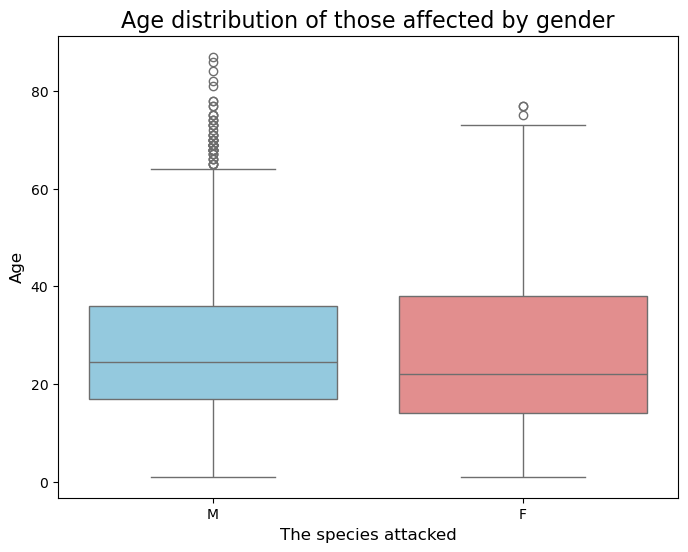

In [15]:
super_df['Age'] = pd.to_numeric(super_df['Age'], errors='coerce')

super_df['Sex '] = super_df['Sex '].astype(str).str.strip().replace('nan', pd.NA)

super_df.dropna(subset=['Age', 'Sex '], inplace=True)

super_df = super_df[super_df['Sex '].isin(['M', 'F'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex ', y='Age', hue='Sex ', data=super_df, palette={'M': 'skyblue', 'F': 'lightcoral'}, order=['M', 'F'], legend=False)
plt.title('Age distribution of those affected by gender', fontsize=16)
plt.xlabel('The species attacked', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

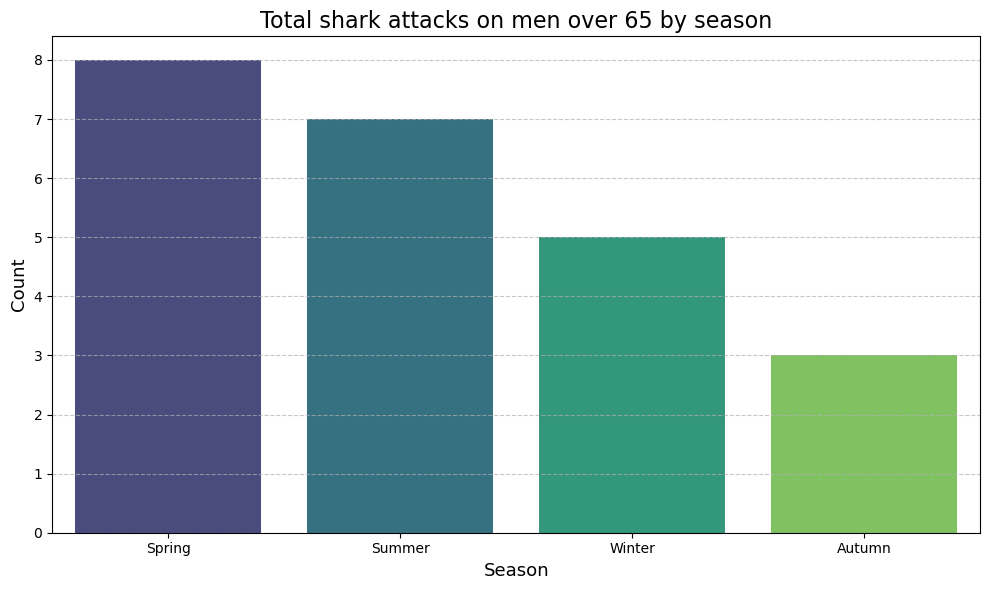

In [16]:
super_df['Date_clean'] = pd.to_datetime(super_df['Date'], errors='coerce', dayfirst=True)
super_df['Month'] = super_df['Date_clean'].dt.month
super_df['Age_clean'] = pd.to_numeric(super_df['Age'], errors='coerce')

super_df['Sex '] = super_df['Sex '].str.strip() 

df_cleaned = super_df.dropna(subset=['Month', 'Age_clean', 'Sex ', 'Country']).copy()

df_men_over_65 = df_cleaned[(df_cleaned['Sex '] == 'M') & (df_cleaned['Age_clean'] >= 65)].copy()

specific_countries = [
    'AUSTRALIA', 'Australia', 'BAHAMAS', 'CAYMAN ISLANDS', 'CHINA', 'FIJI',
    'JAMAICA', 'MEXICO', 'NEW ZEALAND', 'REUNION ISLAND', 'SOUTH AFRICA',
    'SPAIN', 'THAILAND', 'TONGA', 'USA', 'VENEZUELA']

df_men_over_65['Country_Upper'] = df_men_over_65['Country'].str.upper()
specific_countries_upper = [c.upper() for c in specific_countries]

df_men_over_65_specific_countries = df_men_over_65[df_men_over_65['Country_Upper'].isin(specific_countries_upper)].copy()

hemi_map = {
    'AUSTRALIA': 'South',
    'BAHAMAS': 'North',
    'CAYMAN ISLANDS': 'North',
    'CHINA': 'North',
    'FIJI': 'South',
    'JAMAICA': 'North',
    'MEXICO': 'North',
    'NEW ZEALAND': 'South',
    'REUNION ISLAND': 'South',
    'SOUTH AFRICA': 'South',
    'SPAIN': 'North',
    'THAILAND': 'North',
    'TONGA': 'South',
    'USA': 'North',
    'VENEZUELA': 'North'
}

df_men_over_65_specific_countries['Hemisphere'] = df_men_over_65_specific_countries['Country_Upper'].map(hemi_map)

df_men_over_65_final_filtered = df_men_over_65_specific_countries.dropna(subset=['Hemisphere']).copy()

northern_hemi_seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn',
    12: 'Winter'
}

southern_hemi_seasons = {
    1: 'Summer', 2: 'Summer', 3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter', 9: 'Spring', 10: 'Spring', 11: 'Spring',
    12: 'Summer'
}

def map_season(row):
    if row['Hemisphere'] == 'North':
        return northern_hemi_seasons.get(row['Month'])
    elif row['Hemisphere'] == 'South':
        return southern_hemi_seasons.get(row['Month'])
    return np.nan 

df_men_over_65_final_filtered['Season'] = df_men_over_65_final_filtered.apply(map_season, axis=1)

df_men_over_65_final_filtered = df_men_over_65_final_filtered.dropna(subset=['Season']).copy()

seasonal_counts = df_men_over_65_final_filtered['Season'].value_counts().reset_index()
seasonal_counts.columns = ['Season', 'Num_Attacks']

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Num_Attacks', hue='Season', data=seasonal_counts, palette='viridis', legend=False)

plt.title('Total shark attacks on men over 65 by season', fontsize=16)
plt.xlabel('Season', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

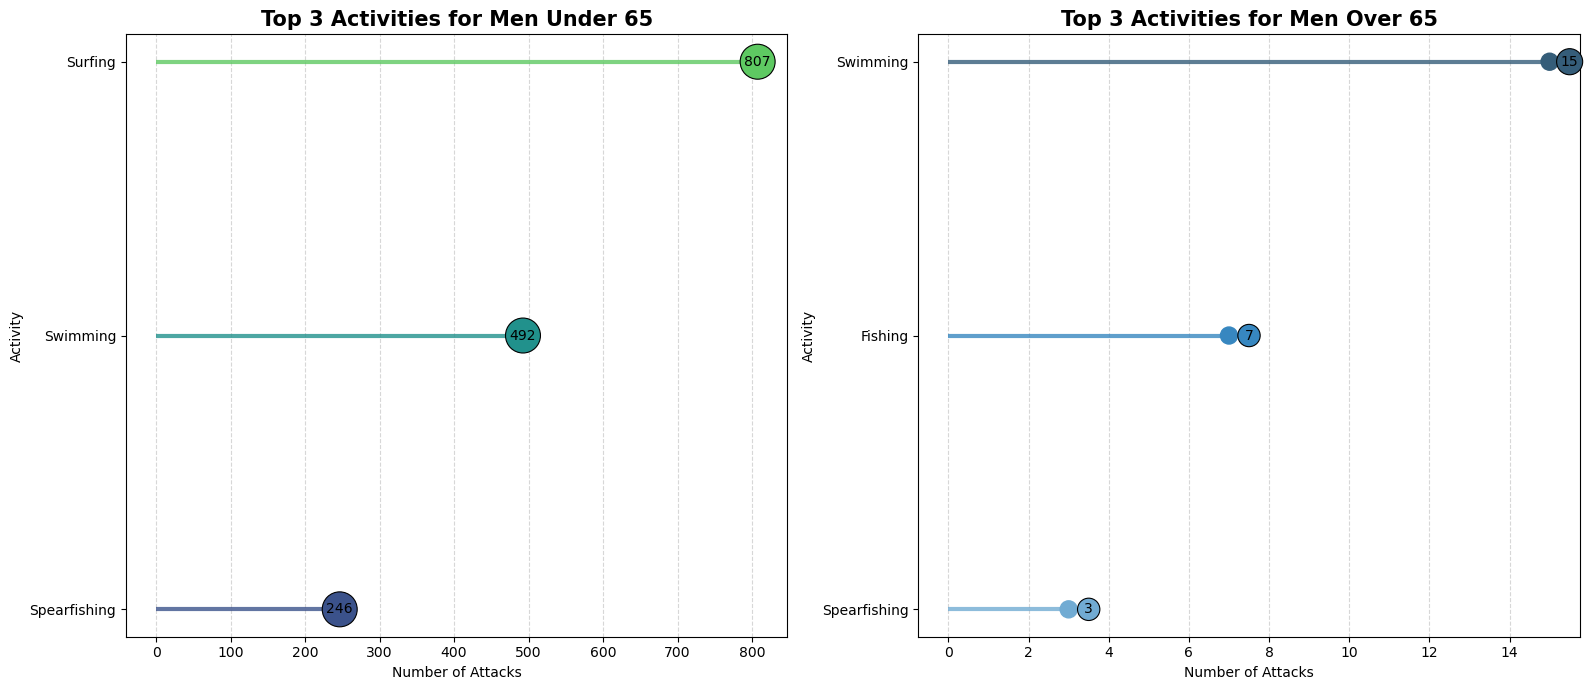

In [17]:
super_df['Age'] = pd.to_numeric(super_df['Age'], errors='coerce')
super_df['Sex '] = super_df['Sex '].astype(str).str.strip().replace('nan', pd.NA)

df_for_activity_analysis = super_df.dropna(subset=['Age', 'Sex ', 'Activity']).copy()

df_for_activity_analysis = df_for_activity_analysis[df_for_activity_analysis['Sex '].isin(['M', 'F'])]

male_attacks_df = df_for_activity_analysis[df_for_activity_analysis['Sex '] == 'M'].copy()

men_under_65 = male_attacks_df[male_attacks_df['Age'] < 65].copy()

top_3_activities_under_65_df = men_under_65['Activity'].value_counts().reset_index()
top_3_activities_under_65_df.columns = ['Activity', 'Count']

top_3_activities_under_65_df = top_3_activities_under_65_df.nlargest(3, 'Count')

men_over_65 = male_attacks_df[male_attacks_df['Age'] >= 65].copy()

top_3_activities_over_65_df = men_over_65['Activity'].value_counts().reset_index()
top_3_activities_over_65_df.columns = ['Activity', 'Count']

top_3_activities_over_65_df = top_3_activities_over_65_df.nlargest(3, 'Count')

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

colors_under = sns.color_palette("viridis", n_colors=3)

top_3_activities_under_65_df = top_3_activities_under_65_df.sort_values('Count')

axes[0].hlines(y=top_3_activities_under_65_df['Activity'], xmin=0, xmax=top_3_activities_under_65_df['Count'], color=colors_under, linewidth=3, alpha=0.8)

axes[0].scatter(top_3_activities_under_65_df['Count'], top_3_activities_under_65_df['Activity'], color=colors_under, s=150, zorder=3)

# הוספת מספרים בתוך עיגול לכל נקודה (ללא לולאת for או ביטויי if)
axes[0].text(top_3_activities_under_65_df['Count'].iloc[0]+0.5, top_3_activities_under_65_df['Activity'].iloc[0], str(top_3_activities_under_65_df['Count'].iloc[0]),va='center', ha='center', fontsize=10,bbox=dict(boxstyle='circle,pad=0.3', facecolor=colors_under[0], edgecolor='black', linewidth=0.8))
axes[0].text(top_3_activities_under_65_df['Count'].iloc[1]+0.5, top_3_activities_under_65_df['Activity'].iloc[1], str(top_3_activities_under_65_df['Count'].iloc[1]),va='center', ha='center', fontsize=10,bbox=dict(boxstyle='circle,pad=0.3', facecolor=colors_under[1], edgecolor='black', linewidth=0.8))
axes[0].text(top_3_activities_under_65_df['Count'].iloc[2]+0.5, top_3_activities_under_65_df['Activity'].iloc[2], str(top_3_activities_under_65_df['Count'].iloc[2]),va='center', ha='center', fontsize=10,bbox=dict(boxstyle='circle,pad=0.3', facecolor=colors_under[2], edgecolor='black', linewidth=0.8))

axes[0].set_title('Top 3 Activities for Men Under 65', fontsize=15, weight='bold')
axes[0].set_xlabel('Number of Attacks')
axes[0].set_ylabel('Activity')
axes[0].grid(axis='x', linestyle='--', alpha=0.5)

colors_over = sns.color_palette("Blues_d", n_colors=3)

top_3_activities_over_65_df = top_3_activities_over_65_df.sort_values('Count')


axes[1].hlines(y=top_3_activities_over_65_df['Activity'],xmin=0,xmax=top_3_activities_over_65_df['Count'],color=colors_over,linewidth=3,alpha=0.8)
axes[1].scatter(top_3_activities_over_65_df['Count'],top_3_activities_over_65_df['Activity'],color=colors_over,s=150,zorder=3)

axes[1].text(top_3_activities_over_65_df['Count'].iloc[0]+0.5, top_3_activities_over_65_df['Activity'].iloc[0], str(top_3_activities_over_65_df['Count'].iloc[0]),va='center', ha='center', fontsize=10,bbox=dict(boxstyle='circle,pad=0.3', facecolor=colors_over[0], edgecolor='black', linewidth=0.8))
axes[1].text(top_3_activities_over_65_df['Count'].iloc[1]+0.5, top_3_activities_over_65_df['Activity'].iloc[1], str(top_3_activities_over_65_df['Count'].iloc[1]),va='center', ha='center', fontsize=10,bbox=dict(boxstyle='circle,pad=0.3', facecolor=colors_over[1], edgecolor='black', linewidth=0.8))
axes[1].text(top_3_activities_over_65_df['Count'].iloc[2]+0.5, top_3_activities_over_65_df['Activity'].iloc[2], str(top_3_activities_over_65_df['Count'].iloc[2]),va='center', ha='center', fontsize=10,bbox=dict(boxstyle='circle,pad=0.3', facecolor=colors_over[2], edgecolor='black', linewidth=0.8))

axes[1].set_title('Top 3 Activities for Men Over 65', fontsize=15, weight='bold')
axes[1].set_xlabel('Number of Attacks')
axes[1].set_ylabel('Activity')
axes[1].grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

במסקנה זו בדקנו את הקשר בין מגדר, גיל הנתקף והעונה הנפוצה ביותר. גילינו כי היחס בין נשים לגברים הוא שגברים נתקפים הרבה יותר מנשים, זיהינו חריגות בטווח הגיל 65 ומעלה, חלקם אפילו מעל גיל 85. בהמשך עניין אותנו לראות מהי הפעילות אותה מבצעים גברים בקבוצה זו- כפי שניתן לראות בגרף הימני מדובר על שחייה, אל מול הפעילות הנפוצה ביותר מתחת לגיל 65 שהיא גלישה. כל אלו התרחשו בעיקר באביב. 


# <span style="color:#0077BE "> Part 3 - The relationship between shark type, the lethality of the attack, and ocean
 
 <div dir='rtl'>

<div> <img src="https://st.depositphotos.com/1139310/1330/i/450/depositphotos_13305944-stock-photo-sharks.jpg" width="500"/> </div>

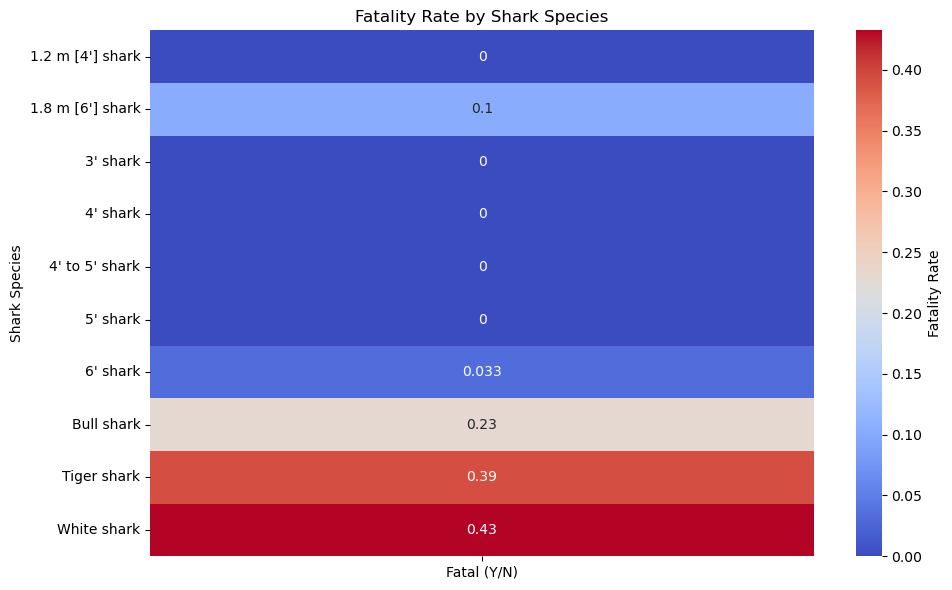

In [21]:
df = super_df[['Species ', 'Fatal (Y/N)']].copy()
df.columns = ['Species ', 'Fatal (Y/N)']
df = df.dropna()
df = df[df['Fatal (Y/N)'].isin(['Y', 'N'])]

df['Fatal (Y/N)'] = df['Fatal (Y/N)'].map({'Y': 1, 'N': 0})

top_species = df['Species '].value_counts().nlargest(10).index
df = df[df['Species '].isin(top_species)]

table = df.pivot_table(index='Species ', values='Fatal (Y/N)', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, cmap='coolwarm', cbar_kws={'label': 'Fatality Rate'})
plt.title('Fatality Rate by Shark Species')
plt.xlabel('')
plt.ylabel('Shark Species')
plt.tight_layout()
plt.show()

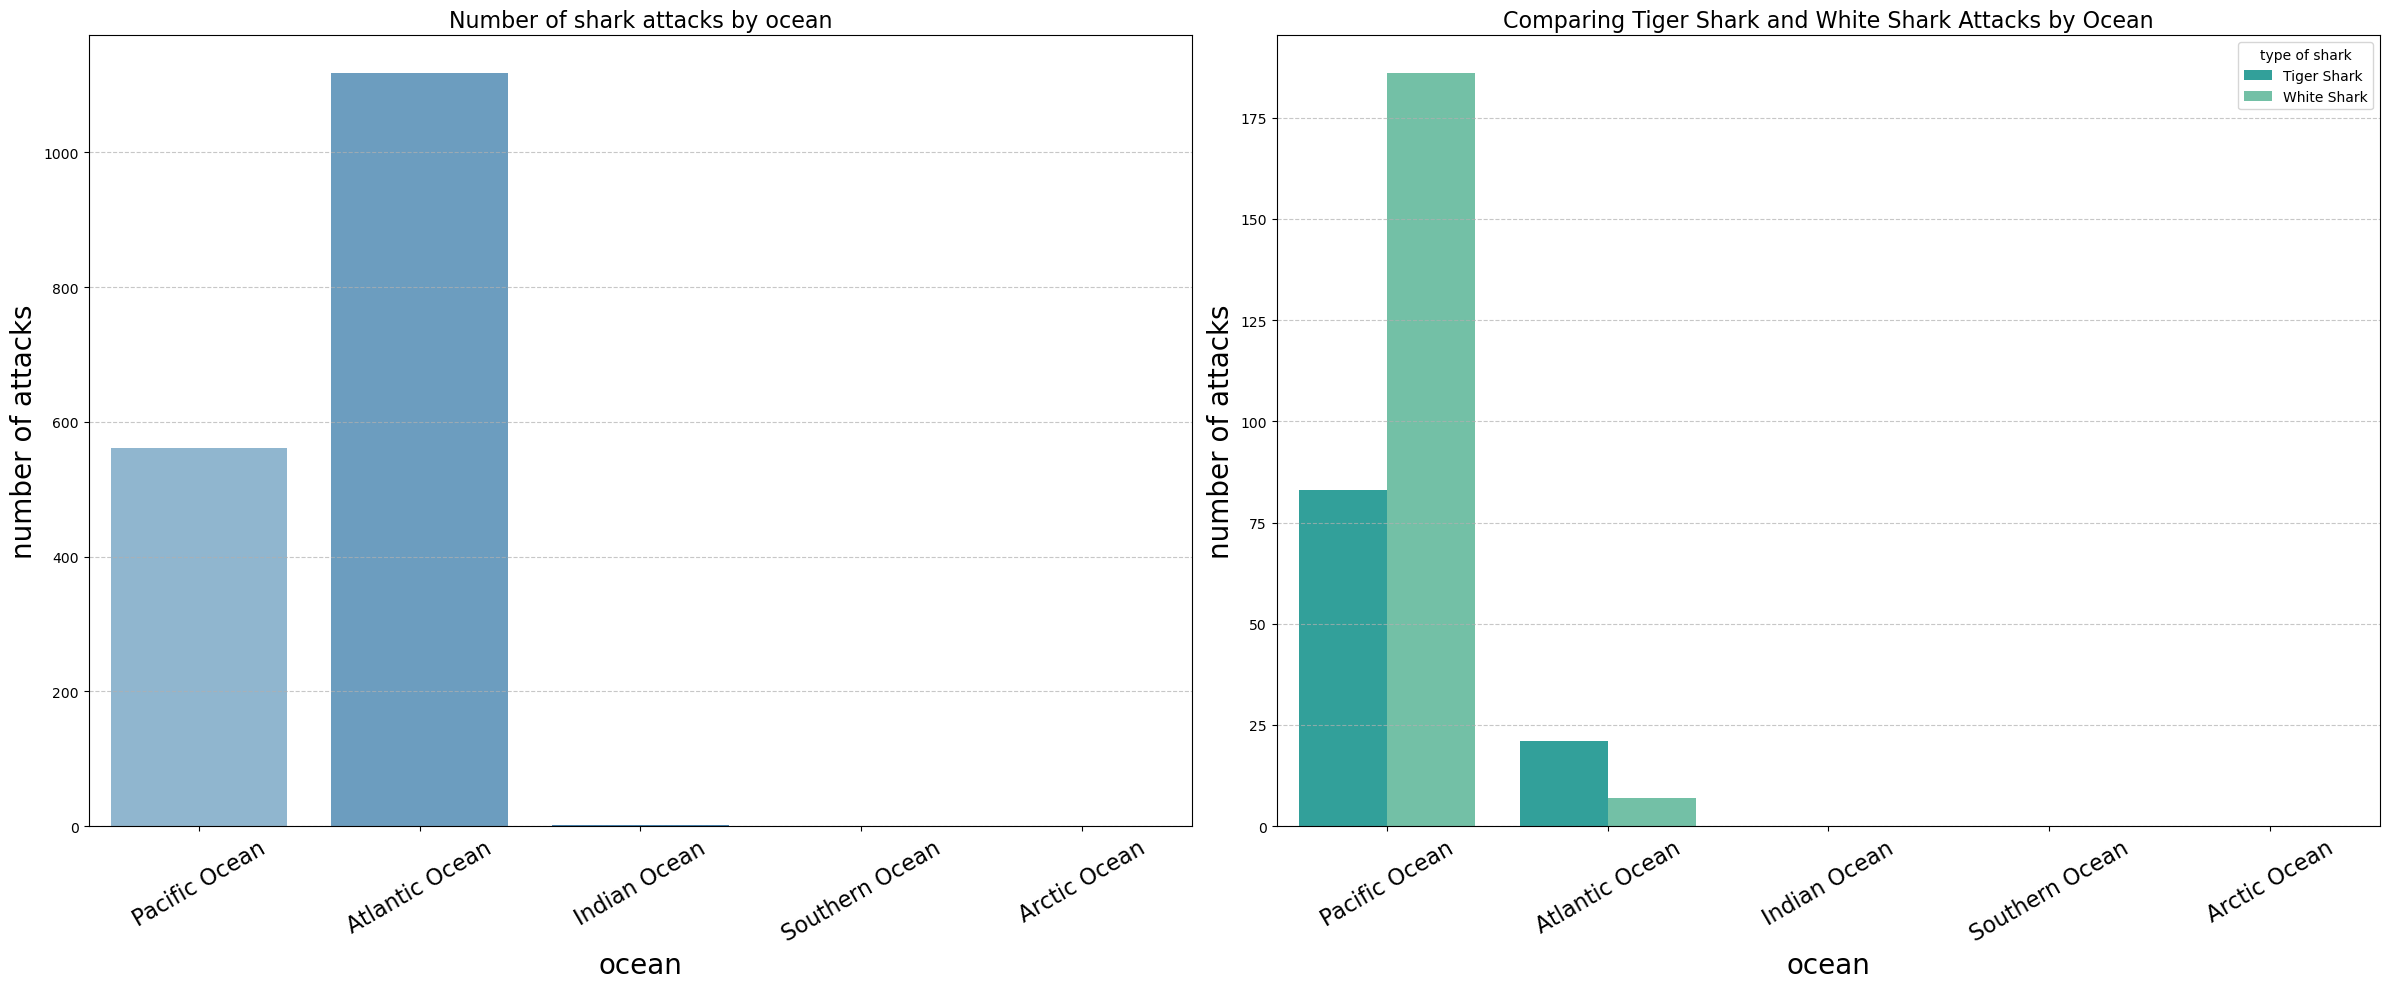

In [22]:
super_df['Combined_Area'] = super_df[ 'Area'].fillna(super_df['Location']).astype(str).str.lower()

ocean_keywords_map = {
    'Pacific Ocean': [
        'australia', 'hawaii', 'california', 'japan', 'new zealand', 'fiji', 'mexico',
        'costa rica', 'peru', 'chile', 'ecuador', 'philippines', 'indonesia', 'china',
        'tonga', 'usa'
    ],
    'Atlantic Ocean': [
        'florida', 'carolina', 'bahamas', 'cuba', 'brazil', 'argentina', 'spain', 'uk',
        'south africa', 'bermuda', 'portugal', 'france', 'new york', 'virginia',
        'jamaica', 'venezuela', 'cayman islands', 'usa'
    ],
    'Indian Ocean': [
        'mozambique', 'madagascar', 'india', 'maldives', 'sri lanka', 'reunion island',
        'seychelles', 'thailand', 'indonesia', 'iran', 'uae', 'australia', 'south africa'
    ],
    'Southern Ocean': ['antarctic', 'southern ocean'],
    'Arctic Ocean': ['arctic', 'greenland', 'alaska']
}


super_df['Ocean'] = super_df['Combined_Area'].apply(lambda x: map_to_ocean(x, ocean_keywords_map))

filtered_df = super_df.copy() 


ordered_oceans = ['Pacific Ocean', 'Atlantic Ocean', 'Indian Ocean', 'Southern Ocean', 'Arctic Ocean']
ocean_attack_counts = filtered_df['Ocean'].value_counts().reindex(ordered_oceans, fill_value=0).reset_index(name='Count')
ocean_attack_counts['Shark Type'] = 'Total Attacks'


species_column = 'Species ' 


filtered_df.loc[:, 'Species_cleaned'] = filtered_df[species_column].astype(str).str.strip().str.lower()

tiger_shark_df_filtered = filtered_df[filtered_df['Species_cleaned'].str.contains('tiger', na=False)].copy()
tiger_ocean_counts = tiger_shark_df_filtered['Ocean'].value_counts().reindex(ordered_oceans, fill_value=0).reset_index(name='Count')
tiger_ocean_counts['Shark Type'] = 'Tiger Shark'

white_shark_df_filtered = filtered_df[filtered_df['Species_cleaned'].str.contains('white', na=False)].copy()
white_shark_ocean_counts = white_shark_df_filtered['Ocean'].value_counts().reindex(ordered_oceans, fill_value=0).reset_index(name='Count')
white_shark_ocean_counts['Shark Type'] = 'White Shark'

combined_shark_counts = pd.concat([tiger_ocean_counts, white_shark_ocean_counts])


fig, axes = plt.subplots(1, 2, figsize=(24, 10))

sns.barplot(x='Ocean', y='Count', data=ocean_attack_counts, palette='Blues_d', ax=axes[0], hue='Ocean', legend=False)

axes[0].set_title('Number of shark attacks by ocean', fontsize=16)
axes[0].set_xlabel('ocean', fontsize=20)
axes[0].set_ylabel('number of attacks', fontsize=20)
axes[0].tick_params(axis='x', rotation=30, **{'labelsize': 16})
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x='Ocean', y='Count', hue='Shark Type', data=combined_shark_counts,palette={'Tiger Shark': 'lightseagreen', 'White Shark': 'mediumaquamarine'}, ax=axes[1])
axes[1].set_title('Comparing Tiger Shark and White Shark Attacks by Ocean', fontsize=16)
axes[1].set_xlabel('ocean', fontsize=20)
axes[1].set_ylabel('number of attacks', fontsize=20)
axes[1].tick_params(axis='x', rotation=30, **{'labelsize': 16})
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title='type of shark')

plt.tight_layout()
plt.show()

במסקנה זו השתמשנו בקורלציה על מנת לבחון את הקשר בין קטלניות התקיפה לבין סוג הכריש, ניתן לראות כי שני הכרישים הכי קטלניים הם White shark ו- Tiger shark.
בחנו את סוגי האוקיינוסים בהם התרחשו הכי הרבה תקיפות בעולם לצד האוקיינוסים בהם תקפו מספר רב ביותר של תקיפות שני הכרישים הללו. כפי שניתן לראות, זה קורה באוקיינוסים הכי נפוצים. 

# <span style="color:#0077BE "> Summary
 <div dir='rtl'>

# <span style="color:black; font-size:0.9em;"> 
מהנתונים שראינו ניתן לראות כי קיים קשר בין פעילויות הימיות הנפוצות באזורים שונים בעולם, לבין כמות התקיפות כרישים
בנוסף, ראינו תקיפות יחודיות לקבוצות מדגם כמו גברים מעל גיל 65 שנתקפו יותר באביב
כל זאת תוך הדגשת החשיבות של אפיון המינים השונים של הכרישים והאוקיינוסים בהם הם חיים
.בכדי להבין טוב יותר את דפוסי הסיכון
 <div dir='rtl'>

<div> <img src="https://static.vecteezy.com/system/resources/previews/012/267/937/non_2x/shark-with-thank-you-note-illustration-on-white-background-vector.jpg" width="500"/> </div>

הפרויקט נעשה על ידי שלושתינו במידה שווה, נפגשנו מספר פעמים בשבוע (בין 3-4 פעמים) בזום על מנת לעבוד, לערוך ולהפיק מהדטה את המסקנות הנ"ל.
תחילה חקרנו ביחד את הפרוייקט וכל אחת העלתה מסקנות שלדעתה יכולות להיות מעניינות.
היו דברים שהתחלנו לחקור אך עם הזמן הבנו שאנחנו לא מגיעות למסקנות רלוונטיות ולכן היה נדרש מאתנו לחשוב בצורה יצרתית ולשנות את כיווני החשיבה שלנו.
למדנו וגילנו דברים חדשים ומעניינים על תקיפות הכרישים בעולם.
למרות האתגרים, נהנינו מאוד מהתהליך ומהגילויים החדשים.
